In [6]:
import sys; sys.path.append('../../wwa'); from wwa import *

In [7]:
def synth_plot(df, ax = None, logged = False):
    
    if not ax: fig, ax = plt.subplots(dpi = 100)
        
    if logged:
        ax.set_xscale('log')
        ax.axvline(1, ls = "--", color = "k", zorder = -99)
    else:
        ax.axvline(0, ls = "--", color = "k", zorder = -99)
    
    gcols = {"obs" : "blue", 
             "obs_synth" : "blue", 
             "models" : "red", 
             "model_synth" : "red",
             "synth" : "magenta"}
    
    for k in range(len(df)):

        r = df.iloc[k]
        ax.add_patch(Rectangle((r.lower,-k-0.4), r.upper - r.lower, 0.8, facecolor = gcols[r.name], alpha = 0.5 + 0.5*("synth" in r.name)))
        ax.add_patch(Rectangle((r.l_wb,-k-0.4), r.u_wb - r.l_wb, 0.8, edgecolor = "k", facecolor = "none", lw = 1.5))

        ax.plot(r.est, -k, color = "k", marker = "v")  

    ax.set_yticks(range(0, -len(df), -1))
    ax.set_yticklabels(df.model)

In [8]:
varnm = "rx1day-obsgmst-1901"

In [9]:
synth = {a.lower()+"_attr" : pd.read_csv("synthesis/synth_"+a+"_attr_"+varnm+".csv", index_col = "group") for a in ["dI","PR"]}

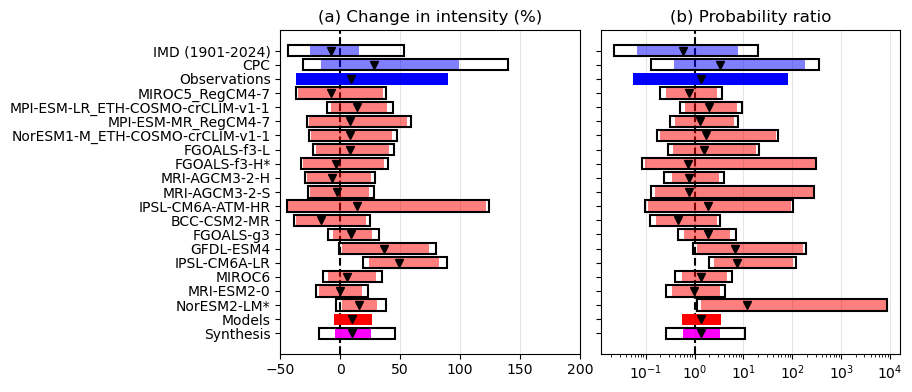

In [10]:
fig, axs = plt.subplots(ncols = 2, sharey = True, figsize = (8,len(synth["di_attr"])*0.2))
plt.subplots_adjust(wspace = 0.07)

synth_plot(synth["di_attr"], ax = axs[0])
axs[0].set_title("(a) Change in intensity (%)")
axs[0].set_xlim(-50,200)

synth_plot(synth["pr_attr"], ax = axs[1], logged = True)
axs[1].set_title("(b) Probability ratio")

for ax in axs:
    ax.grid(axis = "x", color = "k", alpha = 0.1)
    
plt.savefig("fig/synthesis_"+varnm+"_attr.png")

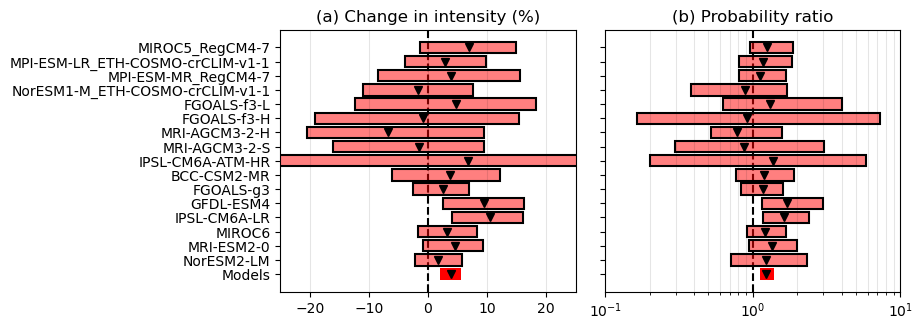

In [10]:
varnm = "rx1day-obsgmst"

synth = {a.lower()+"_proj" : pd.read_csv("synthesis/synth_"+a+"_proj_"+varnm+".csv", index_col = "group") for a in ["dI","PR"]}
fig, axs = plt.subplots(ncols = 2, sharey = True, figsize = (8,len(synth["di_proj"])*0.2))
plt.subplots_adjust(wspace = 0.1)

synth_plot(synth["di_proj"], ax = axs[0])
axs[0].set_xlim(-25,25)
axs[0].grid(axis = "x", which = "major", color = "k", alpha = 0.1)
axs[0].set_title("(a) Change in intensity (%)")

synth_plot(synth["pr_proj"], ax = axs[1], logged = True)
axs[1].set_title("(b) Probability ratio")
axs[1].set_xlim(0.1,10)
axs[1].grid(axis = "x", which = "minor", color = "k", alpha = 0.1)    
    
plt.savefig("fig/synthesis_"+varnm+"_proj.png")